## This notebook performs the same analysis as "Run DESeq2 - Retina" but filters out genes based on a higher gene count threshold.


In [1]:
# Load Unnormalized Read Counts
unnormalized_counts = "../GLDS-202_Unnormalized_Counts.txt"
cts <- as.matrix(read.table(unnormalized_counts, sep="\t", row.names="GeneID", header=TRUE))

# Load Annotations
annotations = "../GLDS-202_203/GLDS-202_SampleTable.csv"
coldata <- read.csv(annotations, row.names=1)

# Retrieve only Retina data
coldata = coldata[coldata$Material %in% "Retina", ]

# Retina Counts Only
retina_cts = cts[ , (colnames(cts) %in% c(rownames(coldata)))]

# DESeq2 requires integers
retina_cts = round(retina_cts)

# Confirm that coldata and retina counts are ordered the same
all(rownames(coldata) == colnames(retina_cts))

[1] TRUE

In [2]:
##### Filter colnames for all comparisons #####

### Time = 7 Days ###
timepoint = "7day"

# Condition = Radiation and Control
retina_7day_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_7day_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_7day_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))



### Time = 1 Month ###
timepoint = "1month"

# Condition = Radiation and Control
retina_1month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_1month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_1month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))


### Time = 4 Month ###
timepoint = "4month"

# Condition = Radiation and Control
retina_4month_radiation_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0.4gray" & Unloading == "Loaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Unloaded and Control
retina_4month_unloaded_colnames =  subset(coldata, 
                                        (Time == timepoint & Radiation == "0gray" & Unloading == "Unloaded")
                                        | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

# Condition = Combination and Control
retina_4month_combination_colnames =  subset(coldata,
                                            (Time == timepoint & Radiation == "0.4gray" & Unloading == "Unloaded")
                                            | (Time == timepoint & Radiation == "0gray" & Unloading == "Loaded"))

In [3]:
##### Filter counts for all comparisons #####

retina_7day_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_radiation_colnames)))]
retina_7day_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_unloaded_colnames)))]
retina_7day_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_7day_combination_colnames)))]

retina_1month_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_radiation_colnames)))]
retina_1month_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_unloaded_colnames)))]
retina_1month_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_1month_combination_colnames)))]

retina_4month_radiation_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_radiation_colnames)))]
retina_4month_unloaded_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_unloaded_colnames)))]
retina_4month_combination_cts = retina_cts[ , (colnames(retina_cts) %in% c(rownames(retina_4month_combination_colnames)))]

In [4]:
# Verify that annotations and counts are in the same order (DESeq2 requirement)

# 7day timepoint
all(rownames(retina_7day_radiation_colnames) == colnames(retina_7day_radiation_cts))
all(rownames(retina_7day_unloaded_colnames) == colnames(retina_7day_unloaded_cts))
all(rownames(retina_7day_combination_colnames) == colnames(retina_7day_combination_cts))

# 1month timepoint
all(rownames(retina_1month_radiation_colnames) == colnames(retina_1month_radiation_cts))
all(rownames(retina_1month_unloaded_colnames) == colnames(retina_1month_unloaded_cts))
all(rownames(retina_1month_combination_colnames) == colnames(retina_1month_combination_cts))

# 1month timepoint
all(rownames(retina_4month_radiation_colnames) == colnames(retina_4month_radiation_cts))
all(rownames(retina_4month_unloaded_colnames) == colnames(retina_4month_unloaded_cts))
all(rownames(retina_4month_combination_colnames) == colnames(retina_4month_combination_cts))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [5]:
run_DESeq2 <- function(counts, labels, comparison, timepoint)
{    
    # Organize data into DESeq2 compatible object
    if (comparison == "radiation" || comparison == "combination")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Radiation)
    }
    else if (comparison == "unloaded")
    {
        dds <- DESeqDataSetFromMatrix(countData = counts,
                                  colData = labels,
                                  design = ~ Unloading)            
    }
    else
    {
        print ("Unrecognized Comparison Argument.")
        return ()
    }
    
    # Prefilter to speed up computation and reduce size of dds
    keep <- rowSums(counts(dds)) >= 3000
    dds <- dds[keep,]
    
    # Run DESeq2
    dds <- DESeq(dds)
    
    # Return Results for Histogram Plotting
    res <- results(dds)
    return (res)
}

In [6]:
library("DESeq2")

res_7day_radiation = run_DESeq2(retina_7day_radiation_cts, retina_7day_radiation_colnames, "radiation", "7day")
res_7day_unloaded = run_DESeq2(retina_7day_unloaded_cts, retina_7day_unloaded_colnames, "unloaded", "7day")
res_7day_combination = run_DESeq2(retina_7day_combination_cts, retina_7day_combination_colnames, "combination", "7day")

res_1month_radiation = run_DESeq2(retina_1month_radiation_cts, retina_1month_radiation_colnames, "radiation", "1month")
res_1month_unloaded = run_DESeq2(retina_1month_unloaded_cts, retina_1month_unloaded_colnames, "unloaded", "1month")
res_1month_combination = run_DESeq2(retina_1month_combination_cts, retina_1month_combination_colnames, "combination", "1month")

res_4month_radiation = run_DESeq2(retina_4month_radiation_cts, retina_4month_radiation_colnames, "radiation", "4month")
res_4month_unloaded = run_DESeq2(retina_4month_unloaded_cts, retina_4month_unloaded_colnames, "unloaded", "4month")
res_4month_combination = run_DESeq2(retina_4month_combination_cts, retina_4month_combination_colnames, "combination", "4month")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

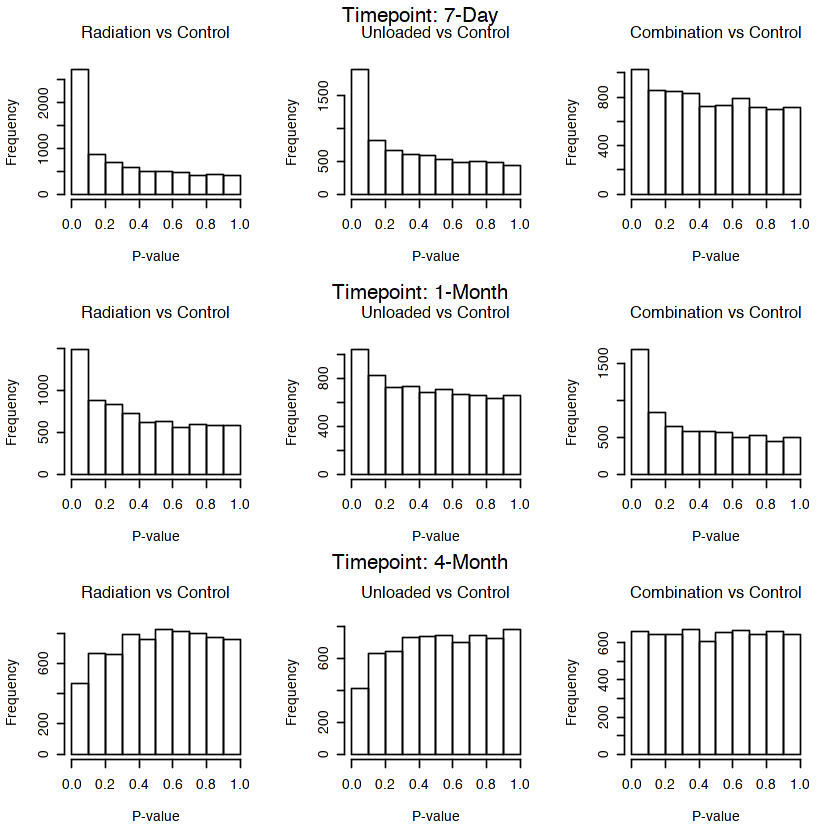

In [7]:
# Plot P-value Distributions for Each Comparison
par(mfrow=c(3,3))

hist(res_7day_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_7day_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_7day_combination$pvalue, main="Combination vs Control", xlab="P-value")

hist(res_1month_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_1month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_1month_combination$pvalue, main="Combination vs Control", xlab="P-value")

hist(res_4month_radiation$pvalue, main="Radiation vs Control", xlab="P-value")
hist(res_4month_unloaded$pvalue, main="Unloaded vs Control", xlab="P-value")
hist(res_4month_combination$pvalue, main="Combination vs Control", xlab="P-value")

mtext("Timepoint: 7-Day", side = 3, line = -1.5, outer = TRUE)
mtext("Timepoint: 1-Month", side = 3, line = -19, outer = TRUE)
mtext("Timepoint: 4-Month", side = 3, line = -36, outer = TRUE)


## The higher filtering threshold redistributed the '7-day Combination vs Control' sample, but did not redistribute the 4-month samples. 